# <center>Specific Heat</center>

Specific heat is a quantity describing how thermal energy supplied to a system affects an increaste in its temperature. To implement it we begin by introducing a normalizing factor that sums up all possible states - we call it partition funciton:

### <center>$Z = Tr(e^{-\beta\hat{H}}) = \sum_i e^{-\beta\epsilon_i}$</center>

And probability of a single state is:

### <center>$p_i = \frac{e^{-\beta\epsilon_i}}{Z} = \frac{e^{-\beta\epsilon_i}}{\sum_i e^{-\beta\epsilon_i}}$</center>

We also need mean energy and variance, but now it has to take into account all possible states, not a specific eigenvector:

### <center>$\langle\hat{H}\rangle = \sum_i\epsilon_ip_i$  and  $\langle\hat{H}^2\rangle = \sum_i\epsilon_i^2p_i$</center>

And formula for specific heat per unit volume is:

### <center>$C_v = \frac{1}{LT^2}\left(\langle\hat{H}^2\rangle - \langle\hat{H}\rangle^2\right)$</center>

Where:
<ul>
    <li>$\beta = \frac{1}{T}$ is a Boltzmann's factor and $T$ is a temperature</li>
    <li>$\epsilon_i$ is an energy level</li>
</ul>

Let's implement it in a code:

In [1]:
import sys
sys.path.append('..')
from HamiltonianClass import Hamiltonian, QuantumState

To start we calculate the canonical ensemble for $T = 0.5$:

In [2]:
L = 4
J = 1
delta = 2

hamiltonian = Hamiltonian(L, J, delta, is_pbc=True)
hamiltonian.truncate_basis_to_spin_zero()
hamiltonian.heisenberg_hamiltonian()
hamiltonian.eigenstates()
hamiltonian.print_matrix()
hamiltonian.print_eigenstates(only_eigenvalues=True)

Matrix size: 6 x 6
Basis reduced to spin zero:
     0011     0101     0110     1001     1010     1100     

        0   0.5000        0        0   0.5000        0
   0.5000  -2.0000   0.5000   0.5000        0   0.5000
        0   0.5000        0        0   0.5000        0
        0   0.5000        0        0   0.5000        0
   0.5000        0   0.5000   0.5000  -2.0000   0.5000
        0   0.5000        0        0   0.5000        0
Eigenvalues:
  -2.7321e+00
  -2.0000e+00
  -1.6575e-16
   3.2279e-16
   3.8577e-16
   7.3205e-01


In [3]:
t = 0.5
ensemble = round(hamiltonian.calculate_ensemble(t), 2)
print(f'Ensemble for T={t} equals {ensemble}')

Ensemble for T=0.5 equals 293.89


Now we calculate $\langle\hat{H}\rangle$ and $\langle\hat{H}^2\rangle$:

In [4]:
mean_H = round(hamiltonian.calculate_mean_energy_power(t, 1), 2)
mean_H_squared = round(hamiltonian.calculate_mean_energy_power(t, 2), 2)
print(f'<H> equals: {mean_H} \n<H^2> equals: {mean_H_squared}')

<H> equals: -2.57 
<H^2> equals: 6.74


And finally we get specific heat:

In [5]:
specific_heat = hamiltonian.calculate_specific_heat(t)
print(f'Specific Heat equals: {specific_heat}')

Specific Heat equals: 0.6297323409381015


In [6]:
import ipywidgets

def calculate_specific_heat(L=2, J=1, delta=1, T=0.5):
    if J != 0:
        quantum_state = QuantumState(L, J, delta)
        specific_heat = round(quantum_state.calculate_specific_heat(T), 5)
        print(f'Specific heat eguals: {specific_heat}')
    else:
        print('[ERROR] J has to be non-zero')

In [7]:
ipywidgets.interact(calculate_specific_heat, 
                    L=[i for i in range(2, 10)],
                    J=(-3, 3, 0.2),
                    delta=(0, 2, 0.2),
                    T=(0.1, 2, 0.1))

interactive(children=(Dropdown(description='L', options=(2, 3, 4, 5, 6, 7, 8, 9), value=2), FloatSlider(value=…

<function __main__.calculate_specific_heat(L=2, J=1, delta=1, T=0.5)>

Now let's see how specific heat looks for larger range of temperatures

In [8]:
import numpy as np
from matplotlib import pyplot as plt

temperature_range = np.linspace(0.01, 2.5, 200)

def plot_specific_heat(L=10, J=1, delta=1):
    if J != 0:
        quantum_state = QuantumState(L, J, delta, is_reduced=True)
        quantum_state.calculate_specific_heat_range(temperature_range)
    
        figure, axes = plt.subplots(1, 1, layout='constrained')
        axes.plot(temperature_range, quantum_state.specific_heat)
        axes.grid()
        axes.set(xlabel='T', ylabel='$C_v$', ylim=[0, 4], 
                 title='Specific heat in function of temperature')
    
        plt.show()

In [9]:
ipywidgets.interact(plot_specific_heat,
                    L=[i for i in range(2, 11, 2)],
                    J=(-3, 3, 0.2),
                    delta=(0, 2, 0.2))

interactive(children=(Dropdown(description='L', index=4, options=(2, 4, 6, 8, 10), value=10), FloatSlider(valu…

<function __main__.plot_specific_heat(L=10, J=1, delta=1)>

And to finish let's see two graphs with and without normalizing factor.

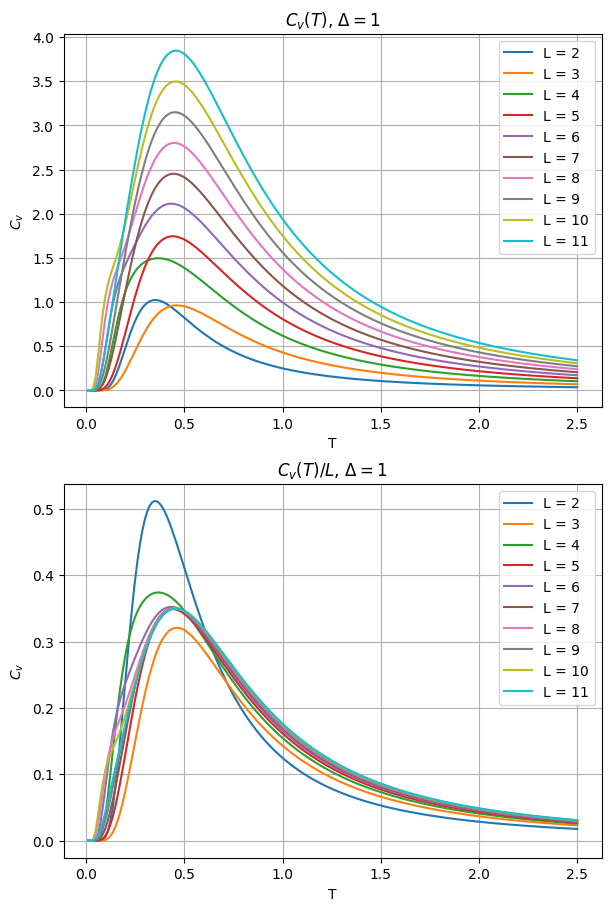

In [11]:
figure, axes = plt.subplots(2, 1, layout='constrained')
delta, J = 1, 1
for L in range(2, 12):
    quantum_state = QuantumState(L, J, delta)
    quantum_state.calculate_specific_heat_range(temperature_range)
    axes[0].plot(temperature_range, quantum_state.specific_heat, label=f'L = {L}')
    axes[1].plot(temperature_range, quantum_state.specific_heat / L, label=f'L = {L}')
axes[0].set_title(f'$C_v(T)$, $\Delta = {delta}$')
axes[1].set_title(f'$C_v(T) / L$, $\Delta = {delta}$')
for index in range(2):
    axes[index].legend(loc='upper right')
    axes[index].grid()
    axes[index].set(xlabel='T', ylabel='$C_v$')
figure.set_size_inches(6, 6 * 1.5)
    
plt.show()